In [11]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
seed = 21

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(class_num))
model.add(keras.layers.Activation('softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_27 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_28 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [13]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
seed = 21

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(class_num))
model.add(keras.layers.Activation('softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
782/782 [==============================] - 286s 364ms/step - loss: 1.9027 - accuracy: 0.2988 - val_loss: 1.5404 - val_accuracy: 0.4381
Epoch 2/25
782/782 [==============================] - 288s 368ms/step - loss: 1.4704 - accuracy: 0.4609 - val_loss: 1.3337 - val_accuracy: 0.5134
Epoch 3/25
782/782 [==============================] - 318s 407ms/step - loss: 1.2924 - accuracy: 0.5314 - val_loss: 1.2232 - val_accuracy: 0.5613
Epoch 4/25
782/782 [==============================] - 249s 318ms/step - loss: 1.1583 - accuracy: 0.5858 - val_loss: 1.0842 - val_accuracy: 0.6124
Epoch 5/25
782/782 [==============================] - 232s 297ms/step - loss: 1.0493 - accuracy: 0.6263 - val_loss: 0.9455 - val_accuracy: 0.6638
Epoch 6/25
782/782 [==============================] - 233s 298ms/step - loss: 0.9596 - accuracy: 0.6577 - val_loss: 0.9267 - val_accuracy: 0.6744
Epoch 7/25
782/782 [==============================] - 258s 329ms/step - loss: 0.8864 - accuracy: 0.6837 - val_loss: 0.8277 -

Epoch 1/25
782/782 [==============================] - 122s 155ms/step - loss: 1.9293 - accuracy: 0.2874 - val_loss: 1.5801 - val_accuracy: 0.4238
Epoch 2/25
782/782 [==============================] - 118s 151ms/step - loss: 1.5102 - accuracy: 0.4513 - val_loss: 1.3888 - val_accuracy: 0.5035
Epoch 3/25
782/782 [==============================] - 117s 150ms/step - loss: 1.3297 - accuracy: 0.5202 - val_loss: 1.2244 - val_accuracy: 0.5565
Epoch 4/25
782/782 [==============================] - 116s 148ms/step - loss: 1.2064 - accuracy: 0.5653 - val_loss: 1.1050 - val_accuracy: 0.6002
Epoch 5/25
782/782 [==============================] - 117s 149ms/step - loss: 1.1018 - accuracy: 0.6078 - val_loss: 1.0678 - val_accuracy: 0.6153
Epoch 6/25
782/782 [==============================] - 115s 147ms/step - loss: 1.0135 - accuracy: 0.6386 - val_loss: 0.9835 - val_accuracy: 0.6542
Epoch 7/25
782/782 [==============================] - 114s 146ms/step - loss: 0.9377 - accuracy: 0.6671 - val_loss: 0.8929 -

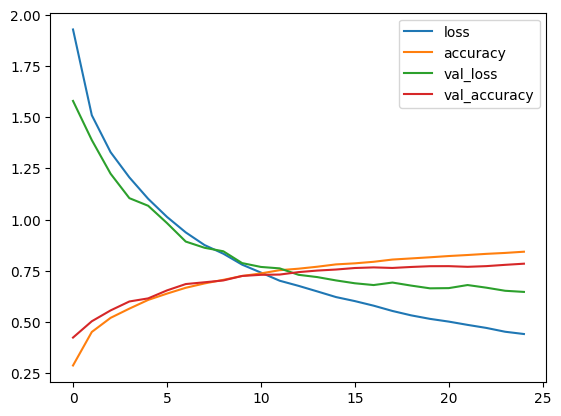

In [2]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
import pandas as pd
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
seed = 21

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, kernel_constraint=maxnorm(3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(class_num))
model.add(keras.layers.Activation('softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs

sgd = keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

pd.DataFrame(history.history).plot()
plt.show()
